# Homework 9 Question 1: Hexagon construction.
The goal is to figure out the optimal geometry of a hexagon such
that (1) the hexagon’s area is maximized and (2) the hexagon’s diameter does not exceed 1. The
diameter of the hexagon is the largest distance between any pair of points belonging to the hexagon.
There are many different ways to solve this problem.

Plot a picture of the optimal hexagon. 

In [5]:
# rectangular coordinates

using JuMP, Ipopt
n = 6
m = Model(solver = IpoptSolver(print_level=0))

@variable(m, x[1:n] )
@variable(m, y[1:n] )

# constraint one vertex on origin
@constraint(m, x[1] == 0)
@constraint(m, y[1] == 0)

# objective to maximize the area of 4 triangles that form the hexagon
@NLobjective(m, Max, 0.5*sum( x[i]*y[i+1]-y[i]*x[i+1] for i=2:n-1))
            
# objective for each vertex with other vertex to be at least 1 unit apart
for i = 1:n
 for j = 1:n
    @NLconstraint(m, ((x[i]-x[j])^2 + (y[i]-y[j])^2) <= 1)
 end
end  

# add ordering constraint to the vertices
for i = 1:n-1
    @NLconstraint(m, x[i]*y[i+1]-y[i]*x[i+1] >= 0 )
end
@NLconstraint(m, x[n]*y[1]-y[n]*x[1] >= 0 )

srand(0)
setvalue(x,rand(n))
setvalue(y,rand(n))

status = solve(m)
println(status)
println("Optimal area: ", getobjectivevalue(m))
getvalue([x y])

Optimal
Optimal area: 0.6749814387708283


6×2 Array{Float64,2}:
 -4.77545e-39  6.83553e-40
  0.295477     0.4745     
  0.11147      0.771206   
 -0.163322     0.986573   
 -0.667303     0.744787   
 -0.633317     0.103904   

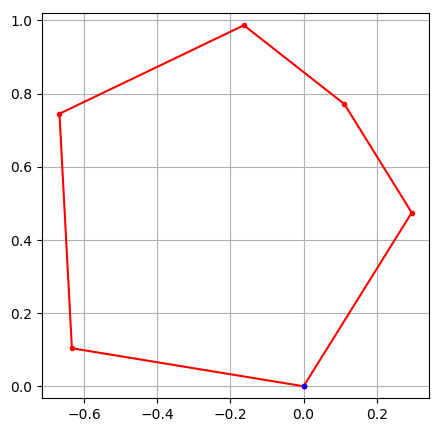

In [6]:
using PyPlot
xopt = getvalue([x; x[1]])
yopt = getvalue([y; y[1]])
figure(figsize=[5,5])
plot( xopt, yopt, "r.-" )
plot( 0,0,"b.")
axis("equal");axis("on")
grid("on");

In [7]:
X = getvalue(x)
Y = getvalue(y)
for i = 1:n
 for j = 1:n
    println("Distance b/w (",i,",",j,") points: ",(X[i]-X[j])^2 + (Y[i]-Y[j])^2)
 end
end

Distance b/w (1,1) points: 0.0
Distance b/w (1,2) points: 0.31245708339472317
Distance b/w (1,3) points: 0.6071847023626462
Distance b/w (1,4) points: 0.9999999986456775
Distance b/w (1,5) points: 0.9999999917541671
Distance b/w (1,6) points: 0.41188606953581264
Distance b/w (2,1) points: 0.31245708339472317
Distance b/w (2,2) points: 0.0
Distance b/w (2,3) points: 0.12189331293971255
Distance b/w (2,4) points: 0.47271526538283504
Distance b/w (2,5) points: 0.9999999986456771
Distance b/w (2,6) points: 0.9999999662853343
Distance b/w (3,1) points: 0.6071847023626462
Distance b/w (3,2) points: 0.12189331293971255
Distance b/w (3,3) points: 0.0
Distance b/w (3,4) points: 0.12189331371192778
Distance b/w (3,5) points: 0.6071847023948855
Distance b/w (3,6) points: 0.9999999994221487
Distance b/w (4,1) points: 0.9999999986456775
Distance b/w (4,2) points: 0.47271526538283504
Distance b/w (4,3) points: 0.12189331371192778
Distance b/w (4,4) points: 0.0
Distance b/w (4,5) points: 0.3124570816

In [8]:
[println("Area of triangle between vertices 1,",i,",",i+1,": ",0.5*(X[i]*Y[i+1]-Y[i]*X[i+1])) for i=2:n-1];

Area of triangle between vertices 1,2,3: 0.08749072052423558
Area of triangle between vertices 1,3,4: 0.11796405728664686
Area of triangle between vertices 1,4,5: 0.2683513197351244
Area of triangle between vertices 1,5,6: 0.20117534122482147
